# Rate Distortion

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import _lib.pr_func as pr
from _lib.utility import *
%config InlineBackend.figure_format = 'retina'
sns.set()

### Setup

In [12]:
# dimensions
N,K = 20,20
pr.set_dims([('w',N),('a',K)])

# environment
U = pr.func(vars=['w','a'],val=gauss_utility(N,K,sigma=2.0))
pw = pr.func(vars=['w'],val='unif').normalize()

# Lagrange multipliers
beta  = 10.0    # p(a) -> p(a|w)

### Blahut-Arimoto iteration

In [13]:
# initializations
pa = pr.func(vars=['a'], val='unif').normalize()
pagw_temp = 0

# BA iteration
for i in range(0,10000):
    pagw = (pa*pr.exp(beta*U)).normalize(['a'])
    pa = pr.sum(pagw*pw,['w'])
    
    # stopping condition
    if np.linalg.norm(pagw.val-pagw_temp)<1e-10: break
    pagw_temp = pagw.val

### Results

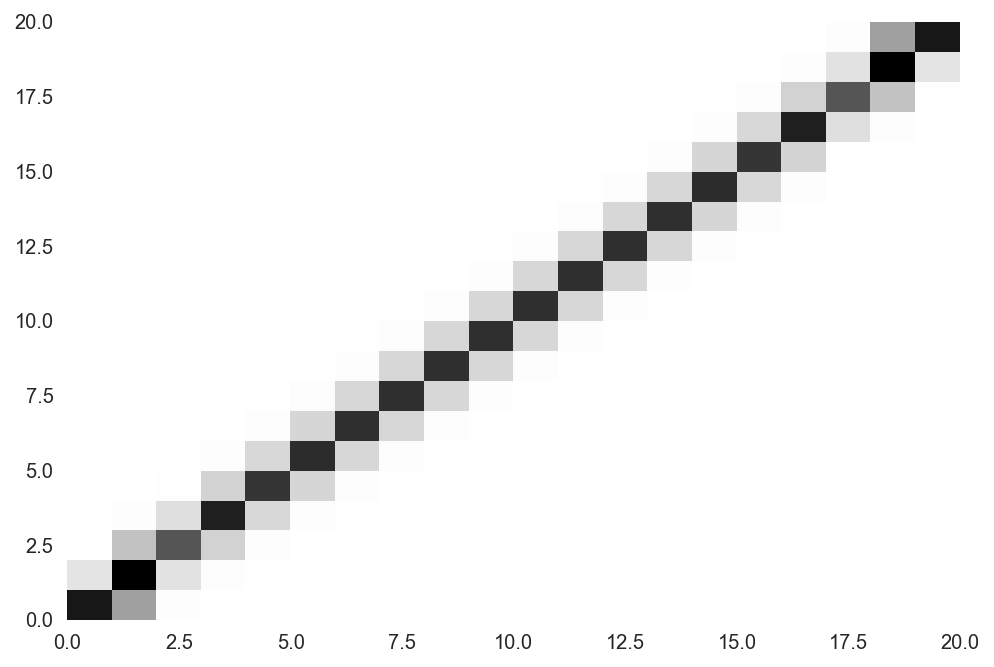

DKL = 2.866, EU = 0.947, FE = 0.661


In [14]:
# plot posterior
plt.pcolor(pagw.val,cmap="Greys")
plt.show()

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print "DKL = {:.3f}, EU = {:.3f}, FE = {:.3f}".format(DKL,EU,FE)